<a href="https://colab.research.google.com/github/itzrnvr/deeplearning-lab/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Assignment 1

This notebook fetches the MNIST dataset directly using `sklearn.datasets.fetch_openml`. Therefore, no manual file uploads to Google Colab are required for the dataset itself. If other external files were needed, code to upload or mount Google Drive would typically be placed here.

In [1]:
# Imports (General)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import time

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Part 1: Feed Forward Network (FFN) using Scikit-learn

## Q1. Download the dataset

In [2]:
# Q1. Download the dataset
mnist = fetch_openml("mnist_784", version=1, as_frame=False, parser='auto')
X = mnist.data
y = mnist.target.astype(np.uint8)
print("MNIST dataset downloaded.")

MNIST dataset downloaded.


## Q2. Print shape of input and target data

In [3]:
# Q2. Print shape of input and target data
print("Shape of X:", X.shape)  # Expected: (70000, 784)
print("Shape of y:", y.shape)  # Expected: (70000,)

Shape of X: (70000, 784)
Shape of y: (70000,)


## Q3. Display the top ten images

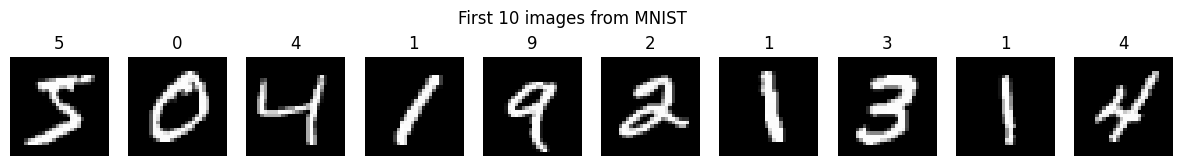

In [4]:
# Q3. Display the top ten images
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(str(y[i]))
    plt.axis('off')
plt.suptitle('First 10 images from MNIST')
plt.show()

## Q4. Transform: Scale Data

In [5]:
# Q4. Transform: Scale Data
X_scaled = X / 255.0
print("Data scaled to [0, 1] range.")

Data scaled to [0, 1] range.


**Note: Q5 is not present in the assignment PDF.**

## Q6. Split the dataset (80% train, 20% test)

In [6]:
# Q6. Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"Train set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")

Train set: 56000 samples, Test set: 14000 samples


## Q7. Train FFN

In [7]:
# Q7. Train FFN
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42, early_stopping=False, solver='adam', activation='relu')
mlp.fit(X_train, y_train)
print("FFN training complete.")

FFN training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## Q8. Predict on test set and evaluate

In [8]:
# Q8. Predict on test set and evaluate
y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9687
Precision: 0.9688, Recall: 0.9687, F1-score: 0.9687

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.96      0.96      0.96      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.98      0.97      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



## Q9. Compare and analyse test accuracy for different train-test splits

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Train size: 60%, Test Accuracy: 0.9658


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Train size: 75%, Test Accuracy: 0.9682


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Train size: 80%, Test Accuracy: 0.9687
Train size: 90%, Test Accuracy: 0.9656


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


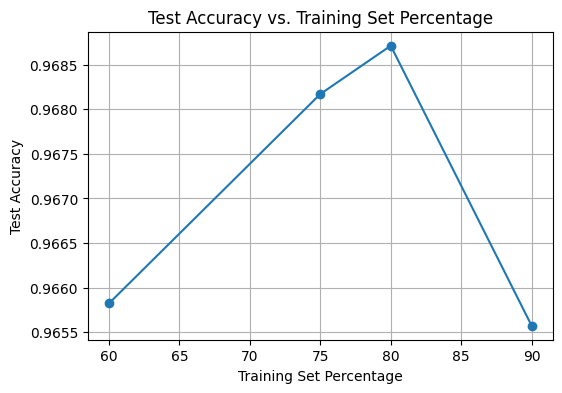

In [9]:
# Q9. Compare and analyse test accuracy for different train-test splits
test_sizes = [0.4, 0.25, 0.20, 0.10]
accuracies = []
train_percentages = []
for test_size in test_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    clf = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42, early_stopping=False, solver='adam', activation='relu')
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    train_percent = int((1 - test_size) * 100)
    train_percentages.append(train_percent)
    accuracies.append(acc)
    print(f"Train size: {train_percent}%, Test Accuracy: {acc:.4f}")

# Plot
plt.figure(figsize=(6,4))
plt.plot(train_percentages, accuracies, marker='o')
plt.xlabel('Training Set Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Training Set Percentage')
plt.grid(True)
plt.show()

## Q10. Playing with the model: Vary number of iterations

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


max_iter=10: Test Accuracy = 0.9687


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


max_iter=20: Test Accuracy = 0.9719


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


max_iter=50: Test Accuracy = 0.9709
max_iter=100: Test Accuracy = 0.9738
max_iter=150: Test Accuracy = 0.9738
max_iter=200: Test Accuracy = 0.9738


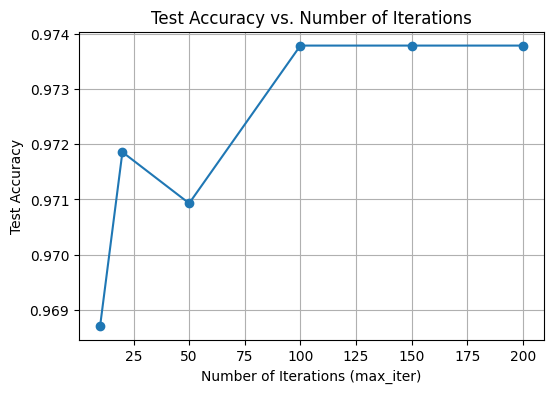

In [10]:
# Q10. Playing with the model: Vary number of iterations
iterations = [10, 20, 50, 100, 150, 200]
accs = []
for max_iter_value in iterations:
    clf = MLPClassifier(hidden_layer_sizes=(64,), max_iter=max_iter_value, random_state=42, early_stopping=False, solver='adam', activation='relu')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    print(f"max_iter={max_iter_value}: Test Accuracy = {acc:.4f}")

# Plot
plt.figure(figsize=(6,4))
plt.plot(iterations, accs, marker='o')
plt.xlabel('Number of Iterations (max_iter)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Iterations')
plt.grid(True)
plt.show()

# Part 2: Exploring Neural Network Design Choices using Keras

## Data Preparation for Keras

In [11]:
# Data Preparation for Keras
X_train_keras, X_test_keras, y_train_keras_orig, y_test_keras_orig = train_test_split(
    X_scaled, y, train_size=60000, test_size=10000, random_state=42
)
y_train_keras = to_categorical(y_train_keras_orig, num_classes=10)
y_test_keras = to_categorical(y_test_keras_orig, num_classes=10)
print("Shapes:")
print("X_train_keras:", X_train_keras.shape)
print("X_test_keras:", X_test_keras.shape)
print("y_train_keras:", y_train_keras.shape)
print("y_test_keras:", y_test_keras.shape)

Shapes:
X_train_keras: (60000, 784)
X_test_keras: (10000, 784)
y_train_keras: (60000, 10)
y_test_keras: (10000, 10)


## 1. Number of Nodes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nodes: 4, Train Acc: 0.8616, Test Acc: 0.8579, Params: 3190, Time: 21.50s
Nodes: 32, Train Acc: 0.9732, Test Acc: 0.9589, Params: 25450, Time: 21.43s
Nodes: 64, Train Acc: 0.9866, Test Acc: 0.9683, Params: 50890, Time: 19.91s
Nodes: 128, Train Acc: 0.9939, Test Acc: 0.9729, Params: 101770, Time: 22.70s
Nodes: 512, Train Acc: 0.9979, Test Acc: 0.9771, Params: 407050, Time: 20.66s
Nodes: 2056, Train Acc: 0.9984, Test Acc: 0.9802, Params: 1634530, Time: 22.33s


,Nodes,Train Acc,Test Acc,Params,Time (s)
0,4,0.861650,0.8579,3190,21.504704
1,32,0.973217,0.9589,25450,21.433995
2,64,0.986633,0.9683,50890,19.910129
3,128,0.993867,0.9729,101770,22.696891
4,512,0.997867,0.9771,407050,20.659131
5,2056,0.998367,0.9802,1634530,22.334347


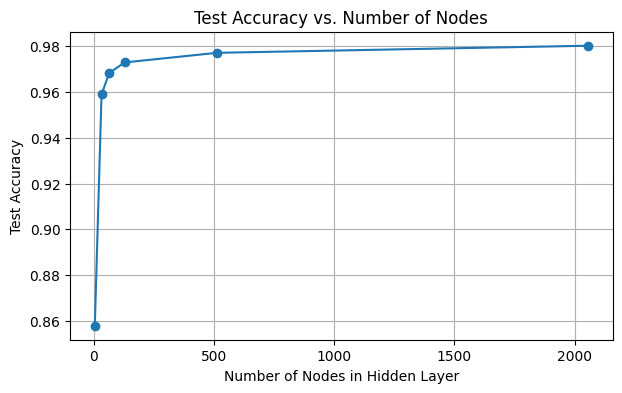

In [12]:
# 1. Number of Nodes
node_counts = [4, 32, 64, 128, 512, 2056]  # Note: 2056 nodes as per PDF, typically powers of 2 like 2048 are used.
results = []
for nodes in node_counts:
    model = Sequential([
        Dense(nodes, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.time()
    model.fit(X_train_keras, y_train_keras, epochs=10, batch_size=128, verbose=0)
    train_acc = model.evaluate(X_train_keras, y_train_keras, verbose=0)[1]
    test_acc = model.evaluate(X_test_keras, y_test_keras, verbose=0)[1]
    end = time.time()
    params = model.count_params()
    results.append((nodes, train_acc, test_acc, params, end-start))
    print(f"Nodes: {nodes}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {params}, Time: {end-start:.2f}s")

# Present results in a table
import pandas as pd
df = pd.DataFrame(results, columns=['Nodes', 'Train Acc', 'Test Acc', 'Params', 'Time (s)'])
display(df)

# Plot
plt.figure(figsize=(7,4))
plt.plot([r[0] for r in results], [r[2] for r in results], marker='o')
plt.xlabel('Number of Nodes in Hidden Layer')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Nodes')
plt.grid(True)
plt.show()

## 2. Number of Layers


### For epochs = 10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Layers: 4, Train Acc: 0.9901, Test Acc: 0.9704, Params: 63370, Time: 21.28s
Layers: 5, Train Acc: 0.9860, Test Acc: 0.9651, Params: 67530, Time: 24.27s
Layers: 6, Train Acc: 0.9916, Test Acc: 0.9722, Params: 71690, Time: 23.00s
Layers: 8, Train Acc: 0.9862, Test Acc: 0.9670, Params: 80010, Time: 24.52s
Layers: 16, Train Acc: 0.9822, Test Acc: 0.9645, Params: 113290, Time: 34.76s


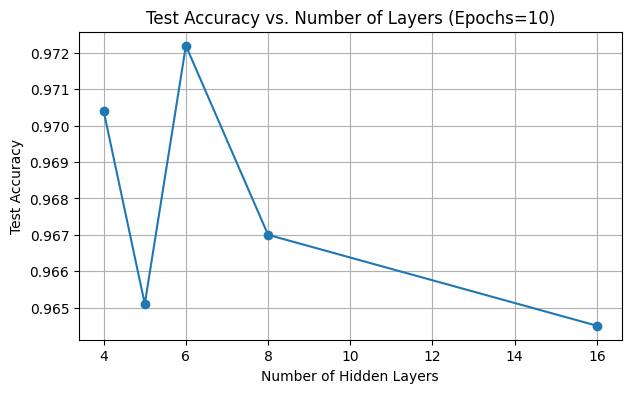


### For epochs = 30
Layers: 4, Train Acc: 0.9950, Test Acc: 0.9707, Params: 63370, Time: 51.70s
Layers: 5, Train Acc: 0.9961, Test Acc: 0.9703, Params: 67530, Time: 50.06s
Layers: 6, Train Acc: 0.9949, Test Acc: 0.9697, Params: 71690, Time: 48.73s
Layers: 8, Train Acc: 0.9955, Test Acc: 0.9725, Params: 80010, Time: 51.91s
Layers: 16, Train Acc: 0.9956, Test Acc: 0.9738, Params: 113290, Time: 75.09s


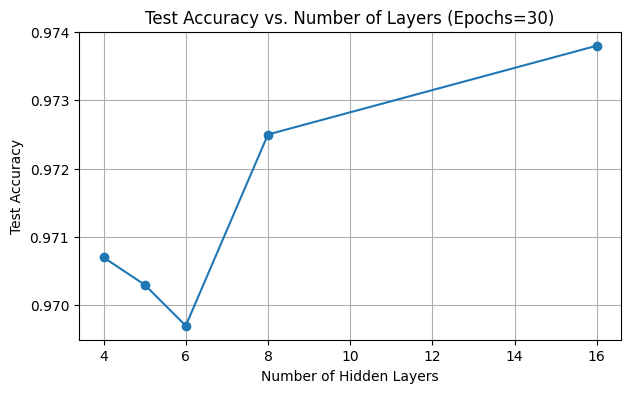

In [13]:
# 2. Number of Layers
num_hidden_layers_list = [4, 5, 6, 8, 16]
epochs_list = [10, 30]
for epochs_count in epochs_list:
    print(f"\n### For epochs = {epochs_count}")
    results_layers = []
    for n_layers in num_hidden_layers_list:
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(784,)))
        for _ in range(n_layers-1):
            model.add(Dense(64, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        start = time.time()
        model.fit(X_train_keras, y_train_keras, epochs=epochs_count, batch_size=128, verbose=0)
        train_acc = model.evaluate(X_train_keras, y_train_keras, verbose=0)[1]
        test_acc = model.evaluate(X_test_keras, y_test_keras, verbose=0)[1]
        end = time.time()
        params = model.count_params()
        results_layers.append((n_layers, train_acc, test_acc, params, end-start))
        print(f"Layers: {n_layers}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {params}, Time: {end-start:.2f}s")
    # Plot for this epoch count
    plt.figure(figsize=(7,4))
    plt.plot([r[0] for r in results_layers], [r[2] for r in results_layers], marker='o', label=f'Epochs={epochs_count}')
    plt.xlabel('Number of Hidden Layers')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracy vs. Number of Layers (Epochs={epochs_count})')
    plt.grid(True)
    plt.show()

## 3. Layer-node combinations

In [14]:
# 3. Layer-node combinations
structures = {
    "Decreasing": [256, 128, 64],
    "Increasing": [64, 128, 256],
    "Uniform_Medium": [128, 128, 128],
    "Bottleneck": [256, 64, 256],
    "Uniform_Small": [64, 64, 64]
}
results_structures = []
for name, S in structures.items():
    model = Sequential()
    model.add(Dense(S[0], activation='relu', input_shape=(784,)))
    for nodes in S[1:]:
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.time()
    model.fit(X_train_keras, y_train_keras, epochs=10, batch_size=128, verbose=0)
    test_acc = model.evaluate(X_test_keras, y_test_keras, verbose=0)[1]
    end = time.time()
    params = model.count_params()
    results_structures.append((name, test_acc, params, end-start))
    print(f"Structure: {name}, Test Acc: {test_acc:.4f}, Params: {params}, Time: {end-start:.2f}s")

# Present results
df_struct = pd.DataFrame(results_structures, columns=['Structure', 'Test Acc', 'Params', 'Time (s)'])
display(df_struct)
best_struct = max(results_structures, key=lambda x: x[1])
print(f"\nBest structure: {best_struct[0]} with Test Accuracy: {best_struct[1]:.4f}")

Structure: Decreasing, Test Acc: 0.9754, Params: 242762, Time: 17.70s
Structure: Increasing, Test Acc: 0.9745, Params: 94154, Time: 21.88s
Structure: Uniform_Medium, Test Acc: 0.9728, Params: 134794, Time: 16.12s
Structure: Bottleneck, Test Acc: 0.9748, Params: 236618, Time: 16.94s
Structure: Uniform_Small, Test Acc: 0.9700, Params: 59210, Time: 17.53s


,Structure,Test Acc,Params,Time (s)
0,Decreasing,0.9754,242762,17.704056
1,Increasing,0.9745,94154,21.876060
2,Uniform_Medium,0.9728,134794,16.121744
3,Bottleneck,0.9748,236618,16.943021
4,Uniform_Small,0.9700,59210,17.530513



Best structure: Decreasing with Test Accuracy: 0.9754


## 4. Input Size (Interpreted as: Run a specific model configuration and report performance)

In [15]:
# 4. Input Size (fixed at 784 for MNIST)
model = Sequential()
for _ in range(4):
    model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model.fit(X_train_keras, y_train_keras, epochs=10, batch_size=128, verbose=0)
train_acc = model.evaluate(X_train_keras, y_train_keras, verbose=0)[1]
test_acc = model.evaluate(X_test_keras, y_test_keras, verbose=0)[1]
end = time.time()
params = model.count_params()
print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {params}, Time: {end-start:.2f}s")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Acc: 0.9920, Test Acc: 0.9722, Params: 400906, Time: 24.17s


The question 'Print accuracies change?' is interpreted as reporting the performance for this specific architecture, as MNIST input size is fixed at 28x28 (784 features).

## 5. Dataset Split

Train Size: 50000, Test Size: 20000, Test Accuracy: 0.9716
Train Size: 40000, Test Size: 30000, Test Accuracy: 0.9641
Train Size: 30000, Test Size: 40000, Test Accuracy: 0.9666
Train Size: 60000, Test Size: 10000, Test Accuracy: 0.9690


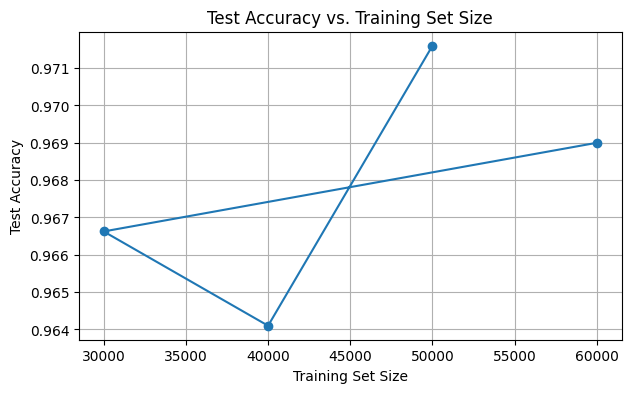

In [16]:
# 5. Dataset Split
train_sizes = [50000, 40000, 30000, 60000]
split_results = []
for current_train_size in train_sizes:
    current_test_size = 70000 - current_train_size
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, train_size=current_train_size, test_size=current_test_size, random_state=42)
    y_tr_cat = to_categorical(y_tr, num_classes=10)
    y_te_cat = to_categorical(y_te, num_classes=10)
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_tr, y_tr_cat, epochs=10, batch_size=128, verbose=0)
    test_acc = model.evaluate(X_te, y_te_cat, verbose=0)[1]
    split_results.append((current_train_size, current_test_size, test_acc))
    print(f"Train Size: {current_train_size}, Test Size: {current_test_size}, Test Accuracy: {test_acc:.4f}")

# Plot
plt.figure(figsize=(7,4))
plt.plot([r[0] for r in split_results], [r[2] for r in split_results], marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Training Set Size')
plt.grid(True)
plt.show()

## 6. Activation function

In [17]:
# 6. Activation function
activations = ['sigmoid', 'tanh', 'relu']
epochs_list = [10, 30]
for epochs_count in epochs_list:
    print(f"\n### For epochs = {epochs_count}")
    for activation_func in activations:
        model = Sequential()
        for _ in range(4):
            model.add(Dense(64, activation=activation_func, input_shape=(784,)))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train_keras, y_train_keras, epochs=epochs_count, batch_size=128, verbose=0)
        train_acc = model.evaluate(X_train_keras, y_train_keras, verbose=0)[1]
        test_acc = model.evaluate(X_test_keras, y_test_keras, verbose=0)[1]
        print(f"Activation: {activation_func}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    # Optionally, plot for each epoch count
    # (Not plotting here to avoid too many plots in notebook)


### For epochs = 10
Activation: sigmoid, Train Acc: 0.9805, Test Acc: 0.9621
Activation: tanh, Train Acc: 0.9890, Test Acc: 0.9685
Activation: relu, Train Acc: 0.9877, Test Acc: 0.9673

### For epochs = 30
Activation: sigmoid, Train Acc: 0.9935, Test Acc: 0.9619
Activation: tanh, Train Acc: 0.9936, Test Acc: 0.9657
Activation: relu, Train Acc: 0.9953, Test Acc: 0.9726


## 7. Activation function combinations

In [18]:
# 7. Activation function combinations
combinations = {
    "Sigmoid-ReLU-Tanh": ['sigmoid', 'relu', 'tanh'],
    "ReLU-Sigmoid-ReLU": ['relu', 'sigmoid', 'relu'],
    "Tanh-ReLU-Sigmoid": ['tanh', 'relu', 'sigmoid'],
    "All ReLU": ['relu', 'relu', 'relu'],
    "All Sigmoid": ['sigmoid', 'sigmoid', 'sigmoid'],
    "All Tanh": ['tanh', 'tanh', 'tanh']
}
combo_results = []
for name, combo_activations in combinations.items():
    model = Sequential()
    model.add(Dense(32, activation=combo_activations[0], input_shape=(784,)))
    model.add(Dense(32, activation=combo_activations[1]))
    model.add(Dense(32, activation=combo_activations[2]))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_keras, y_train_keras, epochs=20, batch_size=128, verbose=0)
    test_acc = model.evaluate(X_test_keras, y_test_keras, verbose=0)[1]
    combo_results.append((name, test_acc))
    print(f"Combination: {name}, Test Accuracy: {test_acc:.4f}")

best_combo = max(combo_results, key=lambda x: x[1])
print(f"\nBest activation combination: {best_combo[0]} with Test Accuracy: {best_combo[1]:.4f}")

Combination: Sigmoid-ReLU-Tanh, Test Accuracy: 0.9609
Combination: ReLU-Sigmoid-ReLU, Test Accuracy: 0.9619
Combination: Tanh-ReLU-Sigmoid, Test Accuracy: 0.9614
Combination: All ReLU, Test Accuracy: 0.9626
Combination: All Sigmoid, Test Accuracy: 0.9580
Combination: All Tanh, Test Accuracy: 0.9576

Best activation combination: All ReLU with Test Accuracy: 0.9626
